In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn.model_selection
import os
import datetime
from matplotlib import pyplot as plt

In [2]:
# Loading dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Getting train and test sets sizes  
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
print("Train set size: {}\nTest set size: {}".format(train_set_size, test_set_size))

Train set size: 60000
Test set size: 10000


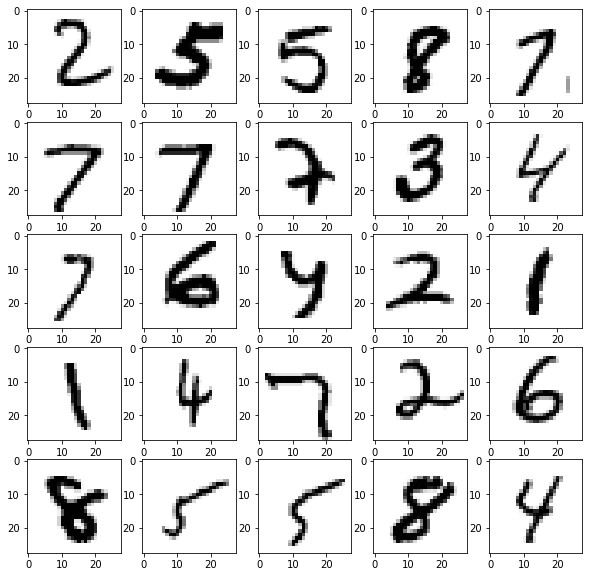

In [4]:
# Plotting a few randomly chosen images from train set
fig=plt.figure(figsize=(10, 10))
dimension = 5
for i in range(1, dimension*dimension +1):
    random_num = np.random.randint(low=0, high=train_set_size-1)
    img = x_train[random_num]
    fig.add_subplot(dimension, dimension, i)
    plt.imshow(img, plt.cm.binary)
plt.show()

In [5]:
# Normalization and reshaping datasets
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
# Cutting a piece of the data from train set to create a validation set
x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(x_train, y_train, test_size=0.05)

In [7]:
# Creating image generator for data augmentation 
images_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    zoom_range=.15
)

In [8]:
# Creating ten similar models, because we will use ensemble technique
nets = 10

model = [0] * nets
for i in range(nets):
    model[i] = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.relu, padding='same', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.relu, padding='same'),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding='same'),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ])  

In [9]:
model[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [10]:
epochs = 30 
batch_size = 128

In [11]:
# Creating LearningRateScheduler to decrease learning rate over the training time
annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [12]:
history = [0] * nets

In [13]:
# Training models and saving results in history variable 
for i in range(nets):
    print("\nCNN {}".format(i+1))

    model[i].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history[i] = model[i].fit(images_generator.flow(x_train, y_train, batch_size=batch_size),
              epochs=epochs, steps_per_epoch=len(x_train)//batch_size, validation_data=(x_val, y_val),
             callbacks=[annealer])
    
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        i+1,epochs,max(history[i].history['accuracy']),max(history[i].history['val_accuracy']) ))


CNN 1
  ...
    to  
  ['...']
Train for 445 steps, validate on 3000 samples
Epoch 1/30
445/445 [==============================] - 11s 24ms/step - loss: 0.5098 - accuracy: 0.8356 - val_loss: 0.0773 - val_accuracy: 0.9797
Epoch 2/30
445/445 [==============================] - 9s 20ms/step - loss: 0.1645 - accuracy: 0.9512 - val_loss: 0.0514 - val_accuracy: 0.9863
Epoch 3/30
445/445 [==============================] - 9s 20ms/step - loss: 0.1202 - accuracy: 0.9649 - val_loss: 0.0462 - val_accuracy: 0.9880
Epoch 4/30
445/445 [==============================] - 9s 20ms/step - loss: 0.1027 - accuracy: 0.9694 - val_loss: 0.0430 - val_accuracy: 0.9887
Epoch 5/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0878 - accuracy: 0.9744 - val_loss: 0.0351 - val_accuracy: 0.9910
Epoch 6/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0792 - accuracy: 0.9765 - val_loss: 0.0359 - val_accuracy: 0.9910
Epoch 7/30
445/445 [==============================] - 9s 20ms/s

445/445 [==============================] - 9s 20ms/step - loss: 0.0326 - accuracy: 0.9905 - val_loss: 0.0192 - val_accuracy: 0.9967
Epoch 26/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.0204 - val_accuracy: 0.9960
Epoch 27/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0291 - accuracy: 0.9914 - val_loss: 0.0216 - val_accuracy: 0.9953
Epoch 28/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0205 - val_accuracy: 0.9957
Epoch 29/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0189 - val_accuracy: 0.9957
Epoch 30/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.0181 - val_accuracy: 0.9960
CNN 2: Epochs=30, Train accuracy=0.99186, Validation accuracy=0.99700

CNN 3
  ...
    to  
  ['...']
Train for 445 steps, validate on 3000 samples


445/445 [==============================] - 9s 20ms/step - loss: 0.0374 - accuracy: 0.9889 - val_loss: 0.0197 - val_accuracy: 0.9967
Epoch 20/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0194 - val_accuracy: 0.9963
Epoch 21/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0332 - accuracy: 0.9905 - val_loss: 0.0186 - val_accuracy: 0.9963
Epoch 22/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0165 - val_accuracy: 0.9977
Epoch 23/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.0160 - val_accuracy: 0.9970
Epoch 24/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0189 - val_accuracy: 0.9970
Epoch 25/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0298 - accuracy: 0.9912 - val_loss: 0.0179 - val_accuracy: 0.9963
Epoc

445/445 [==============================] - 9s 20ms/step - loss: 0.0454 - accuracy: 0.9865 - val_loss: 0.0195 - val_accuracy: 0.9967
Epoch 14/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0197 - val_accuracy: 0.9957
Epoch 15/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0431 - accuracy: 0.9874 - val_loss: 0.0203 - val_accuracy: 0.9960
Epoch 16/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0228 - val_accuracy: 0.9953
Epoch 17/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0191 - val_accuracy: 0.9957
Epoch 18/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0188 - val_accuracy: 0.9967
Epoch 19/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0372 - accuracy: 0.9891 - val_loss: 0.0175 - val_accuracy: 0.9953
Epoc

445/445 [==============================] - 9s 20ms/step - loss: 0.0654 - accuracy: 0.9808 - val_loss: 0.0377 - val_accuracy: 0.9917
Epoch 8/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0590 - accuracy: 0.9829 - val_loss: 0.0272 - val_accuracy: 0.9947
Epoch 9/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0573 - accuracy: 0.9838 - val_loss: 0.0246 - val_accuracy: 0.9953
Epoch 10/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0263 - val_accuracy: 0.9953
Epoch 11/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0490 - accuracy: 0.9854 - val_loss: 0.0270 - val_accuracy: 0.9943
Epoch 12/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0241 - val_accuracy: 0.9957
Epoch 13/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0272 - val_accuracy: 0.9950
Epoch 

445/445 [==============================] - 9s 21ms/step - loss: 0.4700 - accuracy: 0.8486 - val_loss: 0.0880 - val_accuracy: 0.9737
Epoch 2/30
445/445 [==============================] - 9s 20ms/step - loss: 0.1529 - accuracy: 0.9545 - val_loss: 0.0561 - val_accuracy: 0.9867
Epoch 3/30
445/445 [==============================] - 9s 20ms/step - loss: 0.1121 - accuracy: 0.9669 - val_loss: 0.0501 - val_accuracy: 0.9887
Epoch 4/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0976 - accuracy: 0.9712 - val_loss: 0.0493 - val_accuracy: 0.9887
Epoch 5/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0815 - accuracy: 0.9762 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 6/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0734 - accuracy: 0.9783 - val_loss: 0.0266 - val_accuracy: 0.9927
Epoch 7/30
445/445 [==============================] - 9s 20ms/step - loss: 0.0664 - accuracy: 0.9803 - val_loss: 0.0311 - val_accuracy: 0.9937
Epoch 8/30

In [14]:
# Implementing ensembling
results = np.zeros((x_test.shape[0], 10))
for i in range(nets):
    results = results + model[i].predict(x_test)
results = np.argmax(results, axis=-1)
results = results == y_test

In [15]:
predicted_right = np.count_nonzero(results == True)
predicted_wrong = np.count_nonzero(results == False)
print("Prediction accuracy is {:.2f}%".format(predicted_right / test_set_size * 100))
print('Number of images with right predictions: {}'.format(predicted_right))
print('Number of images with wrong predictions: {}'.format(predicted_wrong))

Prediction accuracy is 99.73%
Number of images with right predictions: 9973
Number of images with wrong predictions: 27


In [16]:
for i in range(nets):
    model[i].save(".\Models\model_{}".format(i))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: .\Models\model_0\assets
INFO:tensorflow:Assets written to: .\Models\model_1\assets
INFO:tensorflow:Assets written to: .\Models\model_2\assets
INFO:tensorflow:Assets written to: .\Models\model_3\assets
INFO:tensorflow:Assets written to: .\Models\model_4\assets
INFO:tensorflow:Assets written to: .\Models\model_5\assets
INFO:tensorflow:Assets written to: .\Models\model_6\assets
INFO:tensorflow:Assets written to: .\Models\model_7\assets
INFO:tensorflow:Assets written to: .\Models\model_8\assets
INFO:tensorflow:Assets written to: .\Models\model_9\assets
